In [249]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [250]:
%matplotlib inline

In [251]:
plt.rcParams["figure.figsize"] = (10, 5)

In [252]:
saved_style_state = matplotlib.rcParams.copy() 

In [253]:
edu_data = pd.read_csv("primary_education_data.csv")
print("done")

done


# CODE 1161 - OpenData Project: 
### Women's Primary Completion Rate
#### by Hongjun Qian



<a href="https://ibb.co/p2Xvvdh"><img src="https://i.ibb.co/Q9mFFMD/fl24751556697-image-kucgic39.jpg" alt="fl24751556697-image-kucgic39" border="0"></a>

#### This project aims to comprehend how primary education for females is completed in various nations.



#### <span style="color: blue;">WHO:</span>   The World Bank and the UNESCO Institute for Statistics (UIS)
#### <span style="color: blue;">WHY:</span>   To create a core indicator of an education system's performance that reflects an education system's coverage and the educational attainment of students.
#### <span style="color: blue;">Record Frequency: </span>  Annually

In [10]:
edu_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,101.255234,101.55587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.028069,66.26329,66.115013,66.932449,68.167793,69.499100,69.990547,70.825378,NaN,NaN
2,Afghanistan,AFG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.604069,66.688881,67.129303,65.761513,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,64.063690,64.65110,65.822060,66.608093,66.362289,66.722877,66.927361,67.231689,NaN,NaN
4,Angola,AGO,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <span style="color: blue;"> Key element: </span>
##### Country Name, Years(valid data 1970-2022), Female Primary Completion Rate (% of relevent age group)
#### The primary completion rate is calculated by dividing the population at the age of entry into the last grade of primary school by the number of new entrants (enrolments minus repeaters) into the final grade of primary school.

# 1. Look at the World Today
#### Take a look at completion of primary education for women globally in 21th centrury.

<a href="https://ibb.co/0BbqJth"><img src="https://i.ibb.co/rbrkys4/20230326-155626-scaled.webp" alt="20230326-155626-scaled" border="0"></a>

C:\Users\13766\AppData\Local\Temp\ipykernel_20972\3945225665.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[]

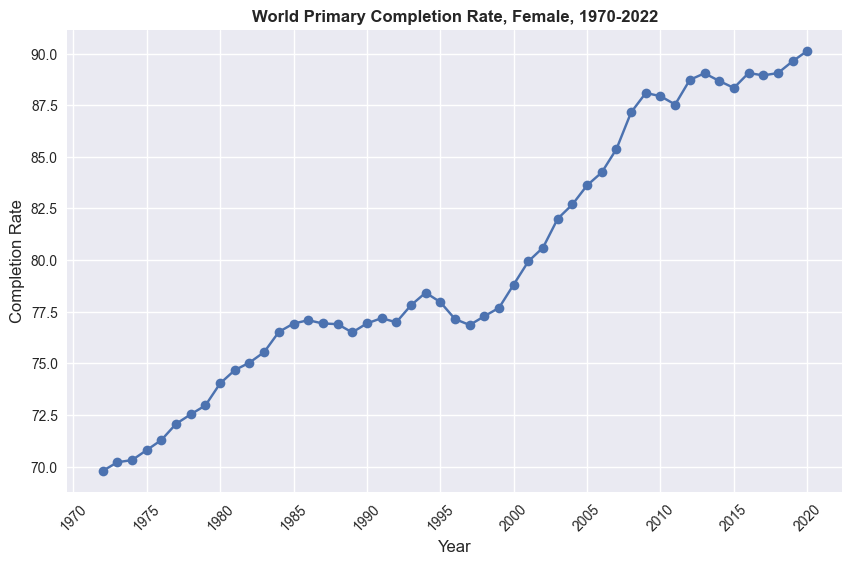

In [17]:
plt.style.use('seaborn')
years = [str(year) for year in range(1970, 2022)]
country_name = 'World'
country_data = edu_data[edu_data.iloc[:, 0] == country_name]
completion_rates = country_data[years].values.flatten()
plt.figure(figsize=(10, 6))
plt.plot(years, completion_rates, marker='o')
plt.title('World Primary Completion Rate, Female, 1970-2022', weight="bold")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Completion Rate', fontsize=12)
plt.grid(True)
plt.xticks(years[::5], rotation=45) 
plt.plot()

#### Observation: 
##### The World Primary Completion Rate for female is continuously growing. After 2000 the number soar. The increase bewteen 2000 and 2010 was double that of 1970-80.
##### The fluctuation of the line can be impacted by many reasons, for example, financial crisis, wars, technological growth.

C:\Users\13766\AppData\Local\Temp\ipykernel_8512\3490595027.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data_2020['Completion Category'] = edu_data_2020[year].apply(categorize_completion_rate)


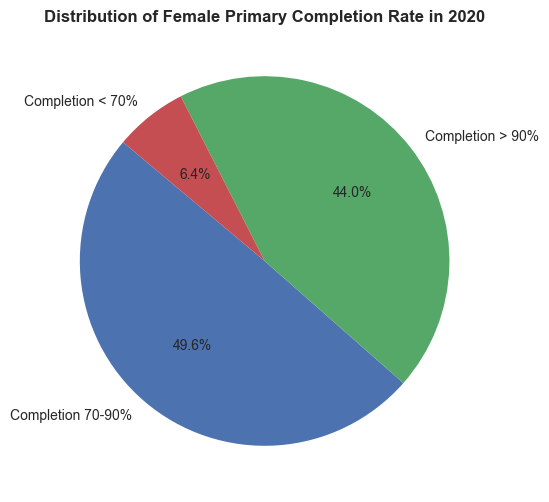

In [243]:
year = '2020'
edu_data_2020 = edu_data[['Country Name', year]]
def categorize_completion_rate(completion_rate):
    if completion_rate > 90:
        return 'Completion > 90%'
    elif completion_rate < 70:
        return 'Completion < 70%'
    else:
        return 'Completion 70-90%'
edu_data_2020['Completion Category'] = edu_data_2020[year].apply(categorize_completion_rate)
completion_counts = edu_data_2020['Completion Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(completion_counts, labels=completion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Female Primary Completion Rate in {year}', weight="bold")
plt.show()

Text(0.5, 1.0, 'Primary Completion Rate World Average, Female, 2020')

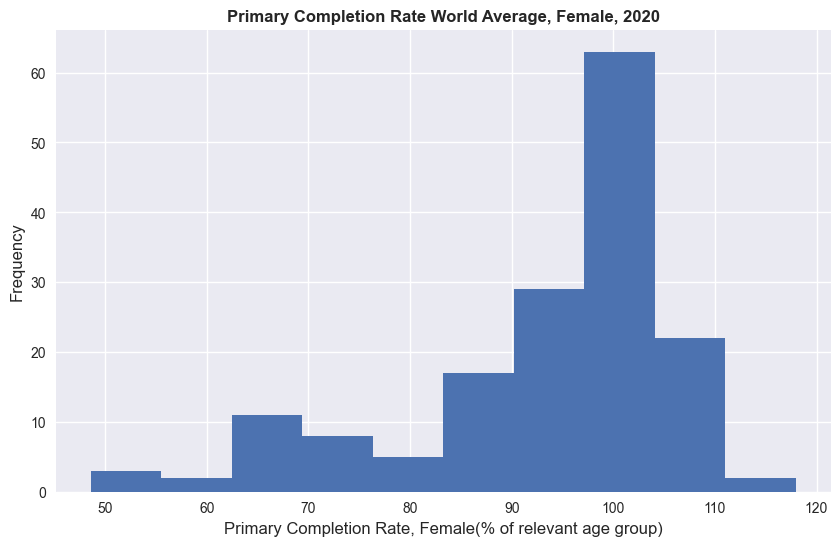

In [227]:
edu_data["2020"].hist(figsize=(10, 6))
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Primary Completion Rate, Female(% of relevant age group)", fontsize=12)
plt.title("Primary Completion Rate World Average, Female, 2020", weight="bold")

#### Observation: 
* ##### In 2020, countries with female primary completion rate above 90% account for nearly half of the total.
* ##### 6.4% of the countries with compltion rate below 70%.
* ##### The reason why the rate exceed 100% may vary. While the denominator is the number of children at the entrance age for the last grade of primary education, the numerator may include late entrants and overage children who have repeated one or more grades as well as children who entered school early.

Text(0.5, 1.0, 'Top 10 Countries for Highest Female Primary Completion Rate, 2020')

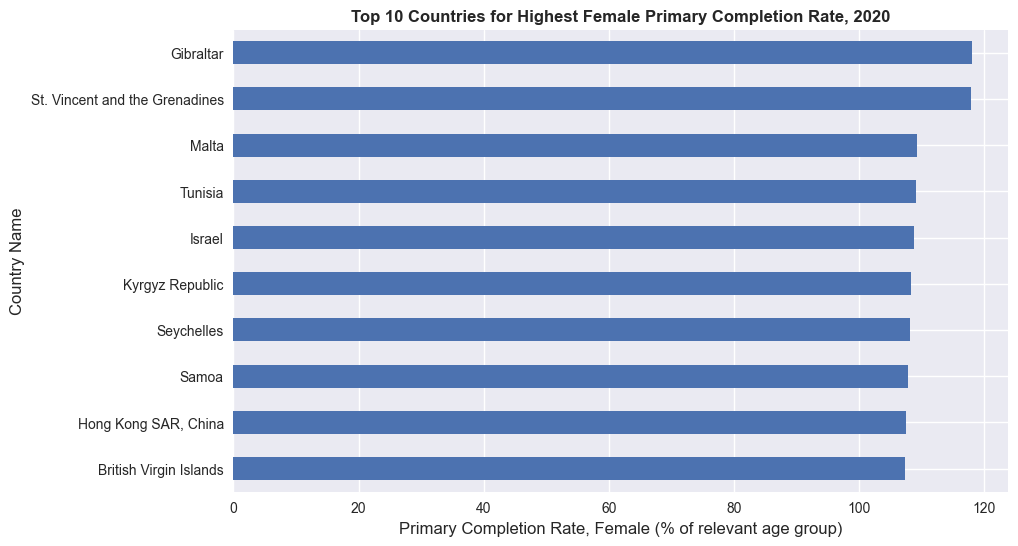

In [225]:
largest = edu_data.nlargest(10, ["2020"]) 
largest.set_index("Country Name")["2020"].plot(figsize=(10, 6), kind="barh")

plt.xlabel("Primary Completion Rate, Female (% of relevant age group)", fontsize=12)
plt.ylabel("Country Name", fontsize=12)
plt.gca().invert_yaxis()
plt.title("Top 10 Countries for Highest Female Primary Completion Rate, 2020", weight="bold")

#### Observation: 
##### This dataset does not sort countries based on their territory or population, which makes tiny countries occupies the top of the chart.

# 2. Look into Countries

#### Take a look at a specific country, how does its primary completion rate change over time?

<a href="https://ibb.co/JCc6906"><img src="https://i.ibb.co/hCgQShQ/Flag-of-Algeria.png" alt="Flag-of-Algeria" border="0"></a>


[]

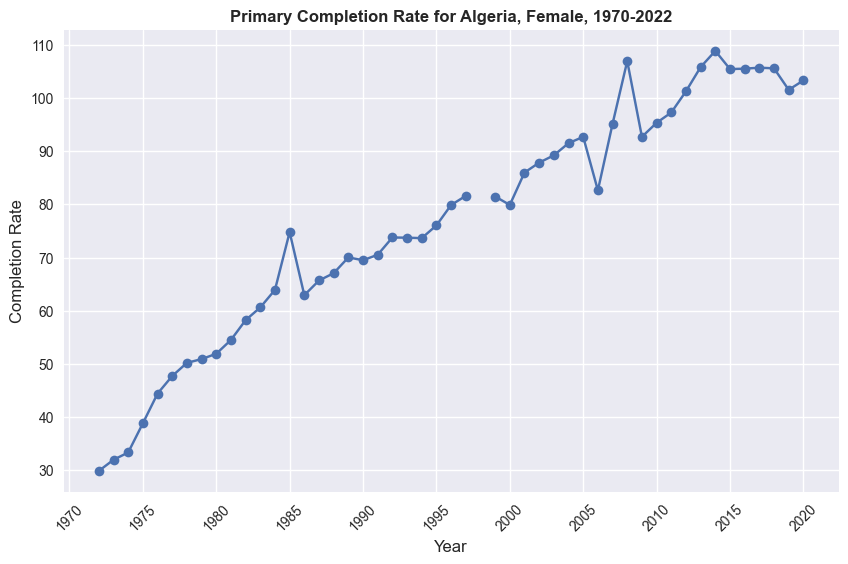

In [244]:
years = [str(year) for year in range(1970, 2023)]
country_name = 'Algeria'
country_data = edu_data[edu_data.iloc[:, 0] == country_name]
completion_rates = country_data[years].values.flatten()
plt.figure(figsize=(10, 6))
plt.plot(years, completion_rates, marker='o')
plt.title('Primary Completion Rate for Algeria, Female, 1970-2022', weight="bold")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Completion Rate', fontsize=12)
plt.grid(True)
plt.xticks(years[::5], rotation=45) 
plt.plot()

### Observation: 
#### The completion rate in Algeria fluctuate quite strongly, it increased overtime, but there are two strong drops around 1985 and 2006.


##### Possible reasons:
* The social unrest in the 1980s as a result of the economic hardship brought on by the collapse in global oil prices.
*  The Islamic Studies dropped from secondary school curriculum and the Baccalaureate certificate.

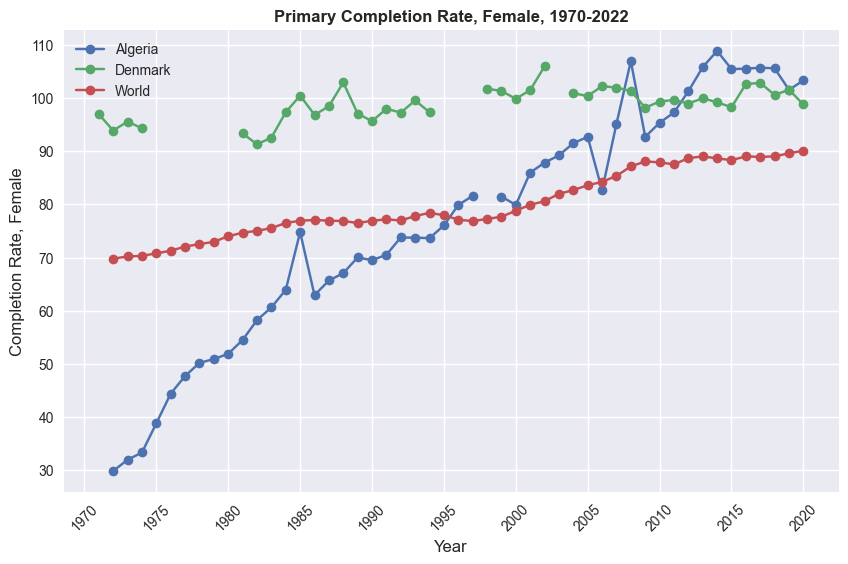

In [245]:
years = [str(year) for year in range(1970, 2023)]
countries_to_plot = ['Algeria', 'Denmark', 'World']
plt.figure(figsize=(10, 6))
for country_name in countries_to_plot:
    country_data = edu_data[edu_data['Country Name'] == country_name]
    completion_rates = country_data[years].values.flatten()
    plt.plot(years, completion_rates, marker='o', label=country_name)
plt.title('Primary Completion Rate, Female, 1970-2022', weight="bold")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Completion Rate, Female', fontsize=12)
plt.grid(True)
plt.legend()  
plt.xticks(years[::5], rotation=45)
plt.show()

#### Observation: 
##### Even compare to a relatively developed contry, Denmark, Algeria's increase on primary completion rate of female is remarkable.

In [107]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


edu_path = r'C:\Users\13766\1161\data_project_2023\primary_education_data.csv'

In [108]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [109]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
edu_data = pd.read_csv("C:\\Users\\13766\\1161\\data_project_2023\\primary_education_data.csv")
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

C:\Users\13766\AppData\Local\Temp\ipykernel_8512\3493916857.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


In [110]:
edc = set(edu_data["Country Name"])
wcc = set(world.name)
print(len(edc), len(wcc))
print(list(edc - wcc))

266 176
['St. Vincent and the Grenadines', 'Sao Tome and Principe', 'Venezuela, RB', 'Curacao', 'St. Kitts and Nevis', 'Bahamas, The', 'Tuvalu', 'Latin America & Caribbean', "Cote d'Ivoire", 'East Asia & Pacific (IDA & IBRD countries)', 'Grenada', 'United States', 'Maldives', 'Gibraltar', 'Marshall Islands', 'IDA only', 'Bermuda', 'Latin America & Caribbean (excluding high income)', 'Mauritius', 'IDA total', 'Cabo Verde', 'Solomon Islands', 'Not classified', 'Palau', 'Iran, Islamic Rep.', 'Northern Mariana Islands', 'Equatorial Guinea', 'Latin America & the Caribbean (IDA & IBRD countries)', 'British Virgin Islands', 'San Marino', 'Lao PDR', 'American Samoa', 'Slovak Republic', 'European Union', 'Middle income', 'South Asia (IDA & IBRD)', 'Isle of Man', 'Early-demographic dividend', 'Congo, Rep.', 'Africa Eastern and Southern', 'Guam', 'Samoa', 'Middle East & North Africa (IDA & IBRD countries)', 'South Sudan', 'Syrian Arab Republic', 'Central Europe and the Baltics', 'Turkiye', 'Chann

In [111]:
'FJI' in list(world.iso_a3)

True

In [112]:
iso_codes = list(world.iso_a3)
overlapping_codes_df = edu_data[[cc in iso_codes for cc in edu_data["Country Code"]]]

# 3. Look into the Missing Data
#### Take a look at all missing values in the dataset, why are these data not available?

<a href="https://ibb.co/B2brbPD"><img src="https://i.ibb.co/CKgMgtd/Puzzle-black-white-missing.jpg" alt="Puzzle-black-white-missing" border="0"></a>

In [113]:
merged_df = overlapping_codes_df.merge(world, left_on='Country Code', right_on='iso_a3')
merged_df = gp.GeoDataFrame(merged_df)
merged_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2019,2020,2021,2022,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,AFG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.761513,NaN,NaN,NaN,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Albania,ALB,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,104.520432,103.379494,99.446632,NaN,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,United Arab Emirates,ARE,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,112.561798,104.618607,NaN,NaN,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,Argentina,ARG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.176582,101.582382,NaN,NaN,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


Text(0.5, 1.0, 'World Female Primary Completion Rate, 2018')

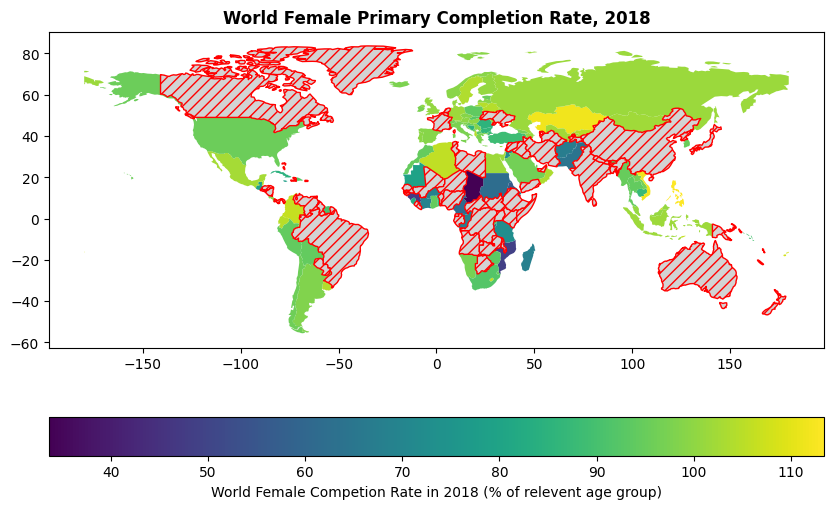

In [195]:
plt.rcdefaults()

merged_df.plot(
    column="2018", 
    figsize=(10, 6),
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
    legend_kwds={"label": "World Female Competion Rate in 2018 (% of relevent age group)", "orientation": "horizontal"}
    )

plt.title("World Female Primary Completion Rate, 2018", weight="bold")

Text(0.5, 1.0, 'World Female Primary Completion Rate, 2008')

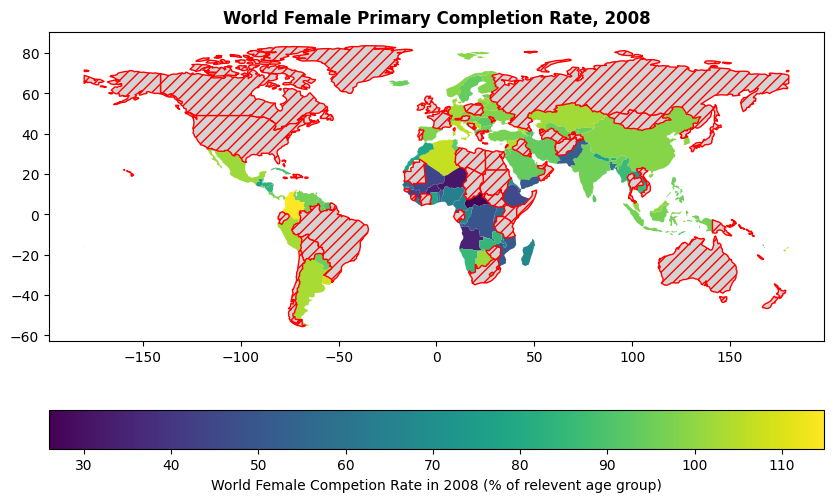

In [173]:
merged_df.plot(
    column="2008", 
    figsize=(10, 6),
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
    legend_kwds={"label": "World Female Competion Rate in 2008 (% of relevent age group)", "orientation": "horizontal"}
    )

plt.title("World Female Primary Completion Rate, 2008", weight="bold")

#### Observation: 
##### A big amount of data is missing from the dataset. At first, I thought it's because the UIS only count developing and undeveloped countries, but the maps disproved my idea. Missing data seemed have no specific pattern. 

C:\Users\13766\AppData\Local\Temp\ipykernel_8512\616891188.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[]

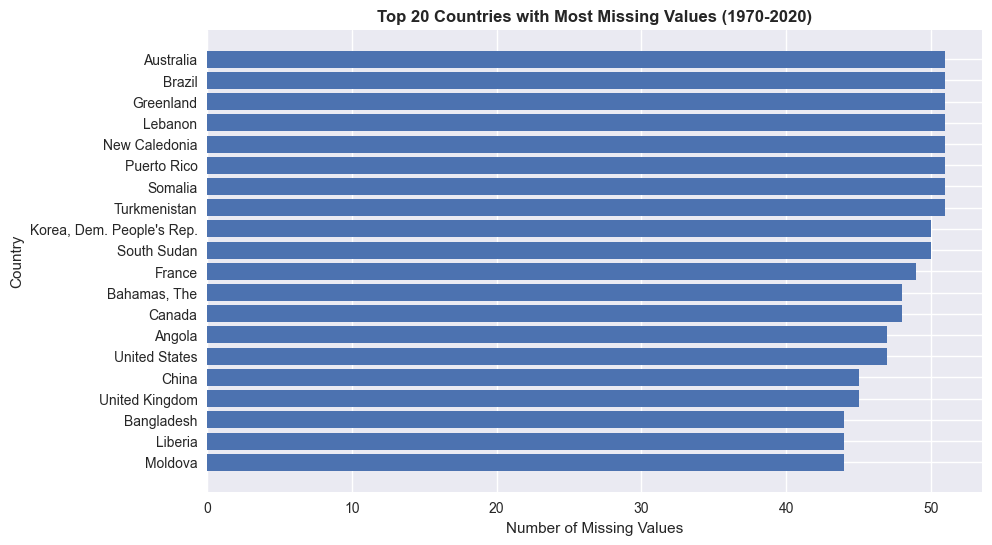

In [204]:
plt.style.use('seaborn')
merged_df["Missing Values"] = merged_df[years].isnull().sum(axis=1)
top_missing_countries = merged_df.nlargest(20, "Missing Values")
plt.figure(figsize=(10, 6))
plt.barh(top_missing_countries["Country Name"], top_missing_countries["Missing Values"])
plt.title('Top 20 Countries with Most Missing Values (1970-2020)', weight="bold")
plt.xlabel('Number of Missing Values')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.plot()

#### Observation: 
##### There are 8 countries don't have any data in the dataset, which might affect the analyze done in part 1.

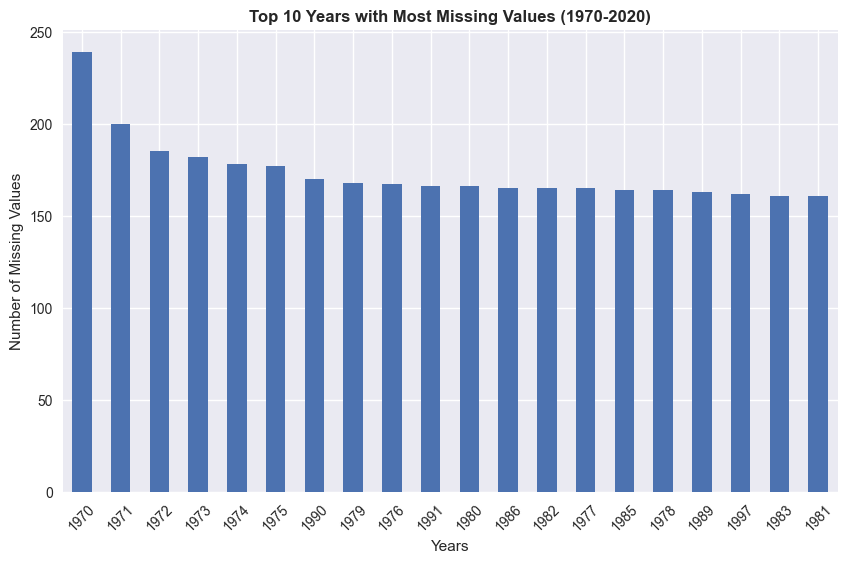

In [254]:
years = [str(year) for year in range(1970, 2021)]
df_selected_years = edu_data[years]
missing_values_per_country = df_selected_years.isnull().sum(axis=0)
top_missing_countries = missing_values_per_country.sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
top_missing_countries.plot(kind='bar')
plt.title('Top 10 Years with Most Missing Values (1970-2020)', weight="bold")
plt.xlabel('Years')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

#### Observation: 
* ##### The year also might impact the number of missing values. 
* ##### Early years have less collected data, which means the calculation of average primary completion rate will be less reliable.

### Discussion
##### This project offered a brief analyze into the female primary completion rate in the world. However, the result can be away from real situation. Due to data restrictions, it is not possible to account for kids who leave school in their final year of schooling. Also, the missing values in the dataset will impact the calculation of average primary completion rate.
<a href="https://ibb.co/BBbbLZ5"><img src="https://i.ibb.co/PgKKxhv/Primary-school-students-770x370-jpg-thumb-1280-1280.jpg" alt="Primary-school-students-770x370-jpg-thumb-1280-1280" border="0"></a>
##### Thank you for watching.